In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats
import random
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
Crredit_Risc = pd.read_csv('Credit Risk.csv')

In [3]:
Crredit_Risc.head(20) #посмотрели первые 20 строк

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
Crredit_Risc.tail() #посмотрели последн. строки

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#  EDA

In [5]:

Crredit_Risc.describe() #вывели общую статистику 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
Crredit_Risc.info() #посмотрели типы данных и также заполненность 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

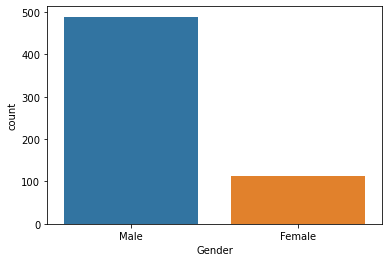

In [7]:


sns.countplot('Gender', data=Crredit_Risc) #частота мужчин и женщин как видим мужчин больше в разы

In [8]:
Crredit_Risc['Gender'].value_counts() #более точное кличество 

Male      489
Female    112
Name: Gender, dtype: int64

Gender


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


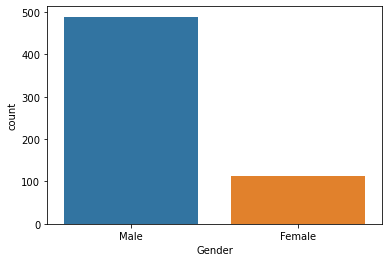

Married


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


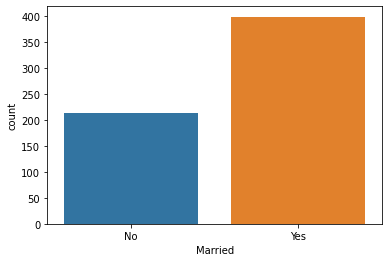

Education


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


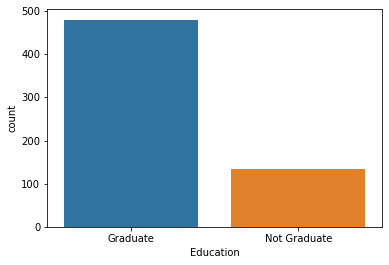

Property_Area


C:\Users\Legion\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


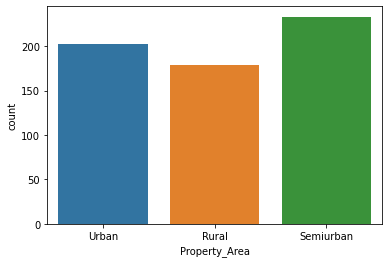

In [9]:
for col in ['Gender', 'Married', 'Education', 'Property_Area']:  #показываем частоты показателей по 4 колонкам
    print(col)
    sns.countplot(Crredit_Risc[col])
    plt.show()

ApplicantIncome


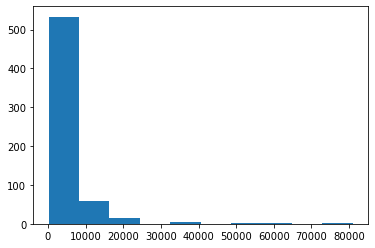

CoapplicantIncome


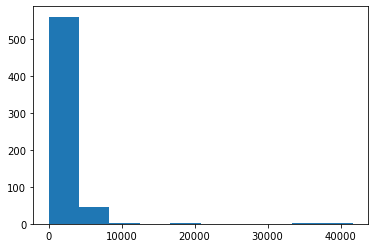

LoanAmount


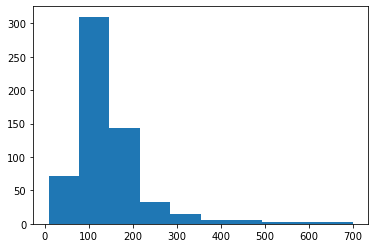

In [10]:
for col in ['ApplicantIncome','CoapplicantIncome', 'LoanAmount']: #строим гистограммы по 3 колонкам и видим что имеются выкиды и также смещение значений в левую сторону
    print(col)
    plt.hist(Crredit_Risc[col])
    plt.show()

In [11]:
gender_metric = Crredit_Risc.groupby('Gender')['ApplicantIncome','CoapplicantIncome','LoanAmount'].agg(np.mean) # в среднем у женщин значения больше
gender_metric

C:\Users\Legion\AppData\Local\Temp/ipykernel_3920/3959993820.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_metric = Crredit_Risc.groupby('Gender')['ApplicantIncome','CoapplicantIncome','LoanAmount'].agg(np.mean) # в среднем у женщин значения больше


,ApplicantIncome,CoapplicantIncome,LoanAmount
Gender,,,
Female,4643.473214,1108.008929,126.697248
Male,5446.460123,1742.932352,149.265957


In [12]:
Crredit_Risc['Loan_Status'] = Crredit_Risc['Loan_Status'].map( {'Y' : 1, 'N' : 0} ) #присваиваем категории да, нет числа 1, 0, то есть вводим dummy переменную 
Crredit_Risc.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [13]:
married_metric = Crredit_Risc.groupby('Married')['ApplicantIncome','CoapplicantIncome','LoanAmount'].agg(np.mean) # смотрим ср знач у женатых больше 
married_metric

C:\Users\Legion\AppData\Local\Temp/ipykernel_3920/1623614232.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  married_metric = Crredit_Risc.groupby('Married')['ApplicantIncome','CoapplicantIncome','LoanAmount'].agg(np.mean) # смотрим ср знач у женатых больше


,ApplicantIncome,CoapplicantIncome,LoanAmount
Married,,,
No,4970.384977,1316.558685,128.883495
Yes,5629.173367,1794.632965,155.750000


Gender


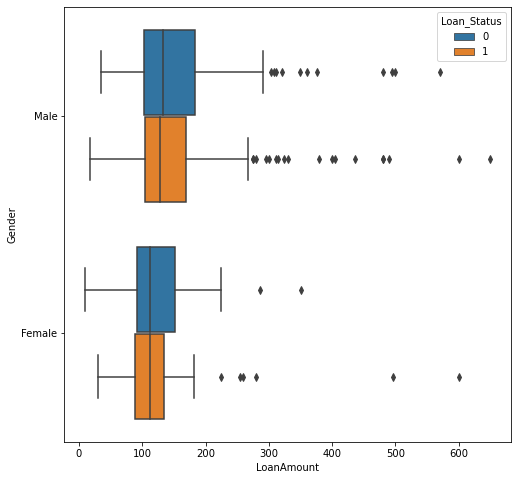

Married


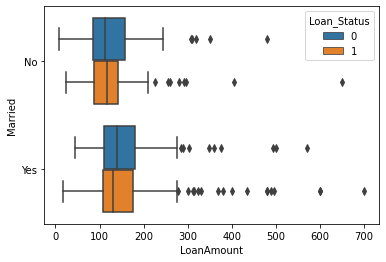

Education


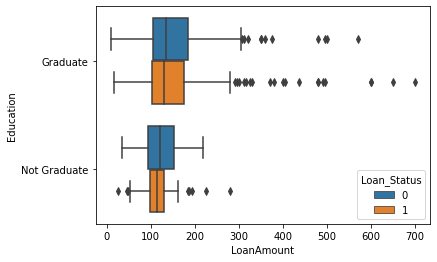

Property_Area


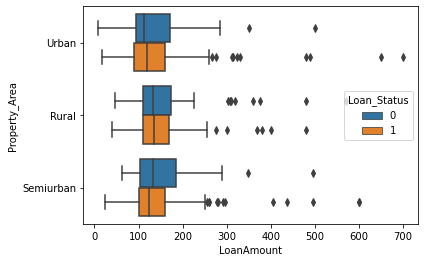

In [14]:
plt.subplots(figsize=(8,8))

for col in ['Gender', 'Married', 'Education', 'Property_Area']: #имеются много выкидов, которые обозначены черными точками
    print(col)
    sns.boxplot(data=Crredit_Risc, x='LoanAmount', y=col, hue='Loan_Status')
    plt.show()


# plt.subplots(figsize=(8,8))
# sns.boxplot(data=Crredit_Risc, x='LoanAmount', y='Property_Area')
# plt.show()

In [15]:
Crredit_Risc.drop('Loan_ID', axis = 1, inplace = True) #удаляем колонку 

In [16]:
Crredit_Risc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [17]:
Crredit_Risc.isnull().sum() # проверяем пропуски

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
Crredit_Risc['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [19]:
Crredit_Risc[Crredit_Risc['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,1
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,1
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,1


In [20]:
list = ['Yes','No']
list_mar = []

for i in range(3):
    random.choice(list)
    list_mar.append(random.choice(list))
list_mar



Crredit_Risc.at[104, 'Married'] = list_mar[0]
Crredit_Risc.at[228, 'Married'] = 'No'
Crredit_Risc.at[435, 'Married'] = list_mar[2] # заполняем пропуски методом условного рандома 

In [21]:
Crredit_Risc[Crredit_Risc['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [22]:
print(Crredit_Risc[['Property_Area', 'Loan_Status']].groupby(['Property_Area'], as_index = False).mean().sort_values(['Loan_Status'], ascending = False))
# смотрим вероятность того что Semiurban люди имеют больше шансов получить лоан статус

  Property_Area  Loan_Status
1     Semiurban     0.768240
2         Urban     0.658416
0         Rural     0.614525


In [23]:
Crredit_Risc['Married'] = Crredit_Risc['Married'].map({'Yes':1, 'No': 0}) #меняем категорию на dummy производную 

In [24]:
Crredit_Risc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [25]:
Crredit_Risc['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
Crredit_Risc['Dependents'] = Crredit_Risc['Dependents'].map( {'0' : 0, '1' : 1, '2' : 2, '3+' : 3} ) #также с колонкой Dependents

In [27]:
Crredit_Risc

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,1,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,1,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,1,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [28]:
Crredit_Risc['Self_Employed'] = Crredit_Risc['Self_Employed'].map({'Yes':1, 'No': 0}) # и также с Self_Employed

In [29]:
Crredit_Risc.isnull().sum()

Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
Crredit_Risc[['Gender', 'Dependents', 'ApplicantIncome']].groupby(['Dependents', 'Gender'], as_index = False).median() # смотрим медиану ApplicantIncome 

,Dependents,Gender,ApplicantIncome
0,0.0,Female,3413.0
1,0.0,Male,3697.5
2,1.0,Female,4608.0
3,1.0,Male,3931.5
4,2.0,Female,3427.0
5,2.0,Male,4183.5
6,3.0,Female,1830.0
7,3.0,Male,4691.0


In [31]:
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] < 3697.5) & (Crredit_Risc['Gender'] == 'Male'), 'Dependents'] = 0
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] > 3697.5) & (Crredit_Risc['ApplicantIncome'] <= 3931.5) & (Crredit_Risc['Gender'] == 'Male'),'Dependents'] = 1
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] > 3931.5) & (Crredit_Risc['ApplicantIncome'] <= 4200.0) & (Crredit_Risc['Gender'] == 'Male'),'Dependents'] = 2
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] > 4200.0) & (Crredit_Risc['Gender'] == 'Male'), 'Dependents'] = 3
    
    # For Females 
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] < 3413.0) & (Crredit_Risc['Gender'] == 'Female'), 'Dependents'] = 0
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] > 4608.0) & (Crredit_Risc['ApplicantIncome'] <= 4200) & (Crredit_Risc['Gender'] == 'Female'),'Dependents'] = 1
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] > 3427.0) & (Crredit_Risc['ApplicantIncome'] <= 4608.0) & (Crredit_Risc['Gender'] == 'Female'),'Dependents'] = 2
    Crredit_Risc.loc[(Crredit_Risc['Dependents'].isnull()) & (Crredit_Risc['ApplicantIncome'] > 4200.0) & (Crredit_Risc['Gender'] == 'Female'), 'Dependents'] = 3
    Crredit_Risc.isnull().sum()
    #заполняем пропуски

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
Crredit_Risc[['ApplicantIncome', 'Self_Employed']].groupby('Self_Employed', as_index = False).median() # мед. знач выше у самозанятых

,Self_Employed,ApplicantIncome
0,0.0,3705.5
1,1.0,5809.0


In [33]:
Crredit_Risc.loc[(Crredit_Risc['Self_Employed'].isnull()) & (Crredit_Risc['ApplicantIncome'] < 5809), 'Self_Employed'] = 0
Crredit_Risc.loc[(Crredit_Risc['Self_Employed'].isnull()) & (Crredit_Risc['ApplicantIncome'] >= 5809), 'Self_Employed'] = 1
#заполняем пустые колонки 

In [34]:
Crredit_Risc.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
meadian_a = Crredit_Risc['ApplicantIncome'].median()
meadian_l = Crredit_Risc['Loan_Amount_Term'].median()
meadian_c = Crredit_Risc['Credit_History'].median()
meadian_lo = Crredit_Risc['LoanAmount'].median()
mod_g = Crredit_Risc['Gender'].mode() #остальные пропуски в колонках заполняем мед. значениями 

In [36]:
Crredit_Risc['ApplicantIncome'].fillna(meadian_a, inplace=True)
Crredit_Risc['Loan_Amount_Term'].fillna(meadian_l, inplace=True)
Crredit_Risc['Credit_History'].fillna(meadian_c, inplace=True)
Crredit_Risc['LoanAmount'].fillna(meadian_lo, inplace=True)
Crredit_Risc['Gender'].fillna('Male', inplace=True)

In [37]:
Crredit_Risc.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

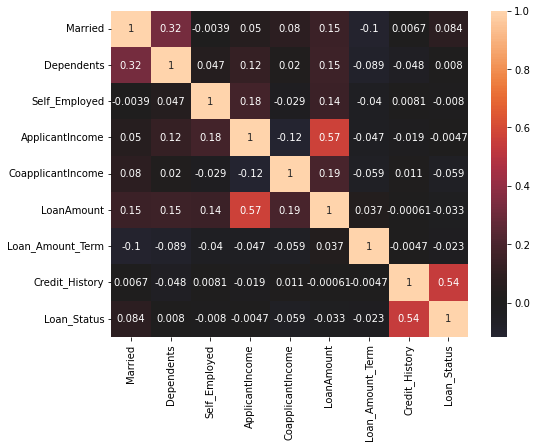

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(Crredit_Risc.corr(), xticklabels=Crredit_Risc.corr().columns, yticklabels=Crredit_Risc.corr().columns, center=0, annot=True)
plt.show()
# есть связь между LoanAmount и ApplicantIncome,  Loan_Status и Credit_History                             

In [39]:
gender = pd.get_dummies(Crredit_Risc['Gender'])
Crredit_Risc = pd.concat([Crredit_Risc, gender], axis = 1) # из колонки гендер делаем дамми проезвд.


In [40]:
Crredit_Risc['Education'] = Crredit_Risc['Education'].map( {'Graduate' : 1, 'Not Graduate' : 0} )
Crredit_Risc['Property_Area'] = Crredit_Risc['Property_Area'].map( {'Rural' : 0, 'Urban' : 2, 'Semiurban' : 1} ) # также и тут

In [41]:
Crredit_Risc.isnull().sum() # видим что нет пропусков 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Female               0
Male                 0
dtype: int64

In [42]:
Crredit_Risc.drop('Gender', axis = 1,inplace = True)

In [43]:
Crredit_Risc.astype(int) # делаем все знач int 


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male
0,0,0,1,0,5849,0,128,360,1,2,1,0,1
1,1,1,1,0,4583,1508,128,360,1,0,0,0,1
2,1,0,1,1,3000,0,66,360,1,2,1,0,1
3,1,0,0,0,2583,2358,120,360,1,2,1,0,1
4,0,0,1,0,6000,0,141,360,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0,71,360,1,0,1,1,0
610,1,3,1,0,4106,0,40,180,1,0,1,0,1
611,1,1,1,0,8072,240,253,360,1,2,1,0,1
612,1,2,1,0,7583,0,187,360,1,2,1,0,1


(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([0.95424251, 1.14332806, 1.33241362, 1.52149917, 1.71058472,
        1.89967027, 2.08875583, 2.27784138, 2.46692693, 2.65601249,
        2.84509804]),
 <BarContainer object of 10 artists>)

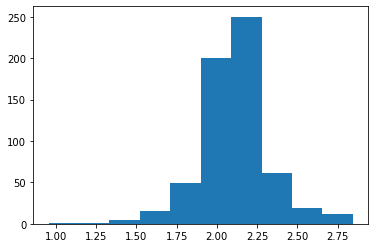

In [44]:
plt.hist(np.log10(Crredit_Risc.LoanAmount)) 
#Построим гистограмму для логарифма цен и проверим гипотезу H_0 о том, что цены имеют логнормальное распределение.

Используем критерий Шапиро для проверки гипотезы о нормальности распределения.

In [45]:
h0_1_p_value = stats.shapiro(np.log10(Crredit_Risc.LoanAmount)).pvalue
print(f'p-value: {h0_1_p_value}')

p-value: 3.1413521957290858e-12


Так как p-value очень маленькое, то с большой долей уверенности критерий Шапиро нашу нулевую гипотезу отвергает, хотя по гистограммам этого не скажешь. Возможно гистограммы имею очень мало корзин. Увеличим, количество корзин до 50

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,
         2.,  0.,  2.,  0.,  3.,  6.,  5.,  8.,  7.,  7., 17., 10., 19.,
        20., 50., 53., 58., 84., 48., 38., 36., 44., 16., 13., 10., 14.,
         8.,  7.,  3.,  6.,  2.,  1.,  4.,  3.,  1.,  2.,  2.]),
 array([0.95424251, 0.99205962, 1.02987673, 1.06769384, 1.10551095,
        1.14332806, 1.18114517, 1.21896228, 1.25677939, 1.2945965 ,
        1.33241362, 1.37023073, 1.40804784, 1.44586495, 1.48368206,
        1.52149917, 1.55931628, 1.59713339, 1.6349505 , 1.67276761,
        1.71058472, 1.74840183, 1.78621894, 1.82403605, 1.86185316,
        1.89967027, 1.93748739, 1.9753045 , 2.01312161, 2.05093872,
        2.08875583, 2.12657294, 2.16439005, 2.20220716, 2.24002427,
        2.27784138, 2.31565849, 2.3534756 , 2.39129271, 2.42910982,
        2.46692693, 2.50474404, 2.54256116, 2.58037827, 2.61819538,
        2.65601249, 2.6938296 , 2.73164671, 2.76946382, 2.80728093,
        2.84509804]),
 <BarContainer

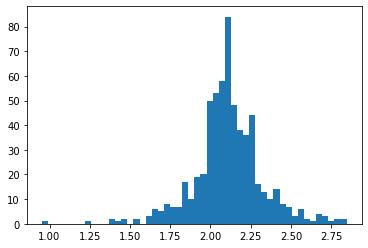

In [46]:
plt.hist(np.log10(Crredit_Risc.LoanAmount), bins=50)

Видны множественные выбросы слева и справа от купола. Гипотеза о нормальном распределении цен оказалась не состоятельной.

In [47]:
Crredit_Risc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int64  
 1   Dependents         614 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Female             614 non-null    uint8  
 12  Male               614 non-null    uint8  
dtypes: float64(6), int64(5), uint8(2)
memory usage: 54.1 KB


In [48]:
(Crredit_Risc['Property_Area'] == 2).mean()

0.3289902280130293

In [49]:
Crredit_Risc.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Female               0
Male                 0
dtype: int64

In [50]:
X = Crredit_Risc[['Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','Female','Male','Dependents']]
Y = Crredit_Risc['LoanAmount']

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','Female','Male', 'Dependents'])
    
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    # ('dtr', RandomForestRegressor(max_depth = 100))
    ('dtr', DecisionTreeRegressor(max_depth = 10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))


R^2 : 0.35412
MAE : 39.13058
MSE : 59.29563


In [51]:
Для улучшения прогноза можно предпринять следующие шаги:

Подобрать другую стратегию заполнения отсутствующих габаритов.
Использовать другой Encoder для категорий и дизайнеров.
Подобрать другой регрессор.
Подобрать наиболее оптимальные параметры регрессора.

SyntaxError: invalid syntax (Temp/ipykernel_3920/1347762735.py, line 1)

In [52]:
Для упрощения подбора параметров выборок и модели создадим процедуру, которая будет принимать на вход выборки и расчитывать оценки для разных регрессоров

SyntaxError: invalid syntax (Temp/ipykernel_3920/2588784605.py, line 1)

In [53]:
'''
'''
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]

    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    #для каждой модели из списка
    for model in models:
        #получаем имя модели
        m = str(model)
        tmp['Model'] = m[:m.index('(')]    
        #обучаем модель
        model.fit(X_train, Y_train) 
        #вычисляем R^2 - коэффициент детерминации
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        #вычисляем MAE - средний модуль отклонения 
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        #вычисляем RMSE - корень из среднего квадрата отклонения
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))

        #записываем данные и итоговый DataFrame
        TestModels = TestModels.append([tmp])
    #делаем индекс по названию модели
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res


In [134]:
X1 = Crredit_Risc[['Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','Female','Male','Dependents']]
Y1 = Crredit_Risc['LoanAmount']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
KNeighborsRegressor,0.52996,34.21545,50.58415
RidgeCV,0.51902,36.96855,51.16961
LassoCV,0.51180,37.81988,51.55202
LinearRegression,0.51001,37.21411,51.64647
GradientBoostingRegressor,0.46572,33.40358,53.93001
RandomForestRegressor,0.33379,35.78060,60.22170
SVR,0.29914,35.75561,61.76795
DecisionTreeRegressor,0.29005,40.18749,62.16713


In [ ]:
Воспользуемся функцией GridSearchCV. Проведем кросс-валидацию и подберем оптимальные параметры для KNeighborsRegressor

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Estimator : RandomForestRegressor(max_depth=10, max_features='sqrt')
Best Score     : 0.3945514253303716

R^2            : 0.48546
MAE            : 35.45662
RMSE           : 52.92446

Feature importance:
--------------------------------
0.03029    Married
0.02113    Education
0.02747    Self_Employed
0.52053    ApplicantIncome
0.16807    CoapplicantIncome
0.06261    Loan_Amount_Term
0.01269    Credit_History
0.04981    Property_Area
0.02411    Loan_Status
0.01567    Female
0.01437    Male
0.05325    Dependents


<AxesSubplot:>

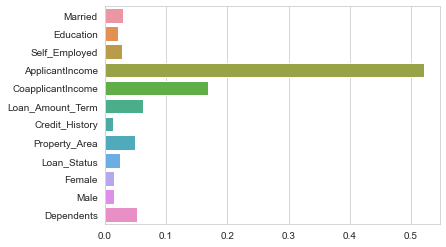

In [55]:
from sklearn.model_selection import GridSearchCV, cross_val_score

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [100,500], 'max_depth': [10,100,None], 'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=3)
forest_grid.fit(X_train, Y_train)

print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')
for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

In [137]:
# почистим данные мотодом IQR
X1 = Crredit_Risc[['Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','Female','Male']]

Q1_A = np.quantile(Crredit_Risc.ApplicantIncome, 0.25)
Q3_A = np.quantile(Crredit_Risc.ApplicantIncome, 0.75)
IQR_A = Q3_A - Q1_A

lower_limit_A = Q1_A - 1.5*IQR_A
UPPER_limit_A = Q3_A + 1.5*IQR_A

Q1_C = np.quantile(Crredit_Risc.CoapplicantIncome, 0.25)
Q3_C = np.quantile(Crredit_Risc.CoapplicantIncome, 0.75)
IQR_C = Q3_C - Q1_C

lower_limit_C = Q1_C - 1.5*IQR_C
UPPER_limit_C = Q3_C + 1.5*IQR_C

Q1_L = np.quantile(Crredit_Risc.LoanAmount, 0.25)
Q3_L = np.quantile(Crredit_Risc.LoanAmount, 0.75)
IQR_L = Q3_L - Q1_L

lower_limit_L = Q1_L - 1.5*IQR_L
UPPER_limit_L = Q3_L + 1.5*IQR_L

clean_df = Crredit_Risc[(Crredit_Risc.ApplicantIncome > lower_limit_A) & (Crredit_Risc.ApplicantIncome < UPPER_limit_A) &
                        (Crredit_Risc.CoapplicantIncome > lower_limit_C) & (Crredit_Risc.CoapplicantIncome < UPPER_limit_C)]
                        

#print(lower_limit ,UPPER_limit)
clean_df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male
0,0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2,1,0,1
1,1,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,1,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1,0,1
3,1,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1,0,1
4,0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1,1,0
610,1,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1,0,1
611,1,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1,0,1
612,1,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1,0,1


In [139]:
#Попробуем спрогнозировать LoanAmount на очищенном Dataframe используя только влиятильные показатели 

X2 = clean_df[['Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area','Loan_Status','Dependents']]
Y2 = clean_df['LoanAmount']

test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
SVR,0.53821,25.81736,36.22204
RandomForestRegressor,0.53724,26.60838,36.26012
LassoCV,0.53488,26.38601,36.35260
RidgeCV,0.53422,26.42616,36.37821
GradientBoostingRegressor,0.53420,27.84395,36.37913
LinearRegression,0.53341,26.44194,36.40993
KNeighborsRegressor,0.48028,27.69148,38.42706
DecisionTreeRegressor,0.30922,34.59105,44.30164


результат стал лучше 

In [79]:
# 
X3 = Crredit_Risc[['Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area','Loan_Status','Dependents']]
Y3 = Crredit_Risc['LoanAmount']

test2 = getBestRegressor(X3, Y3)
test2['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
KNeighborsRegressor,0.52996,34.21545,50.58415
RidgeCV,0.51269,37.66285,51.50492
LassoCV,0.51180,37.81988,51.55202
LinearRegression,0.50979,37.72899,51.65818
GradientBoostingRegressor,0.41746,35.95613,56.31317
SVR,0.36084,36.55209,58.98644
RandomForestRegressor,0.28584,37.13172,62.35117
DecisionTreeRegressor,0.00060,43.42575,73.75930


<AxesSubplot:xlabel='LoanAmount'>

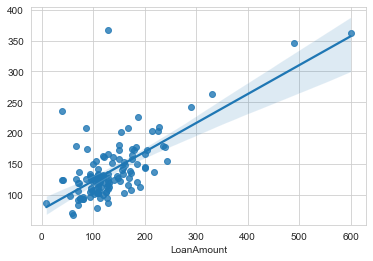

In [140]:
sns.regplot(x=Y_test, y=forest_grid.predict(X_test)) #посмтроим график регрессии 

In [142]:
ts_df = pd.read_csv('Credit Risk.csv')

In [143]:
X5 = clean_df[['Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area','Dependents']]
y5 = clean_df['Loan_Status']

In [144]:
X5

,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Dependents
0,0.0,5849,0.0,360.0,2,0.0
1,0.0,4583,1508.0,360.0,0,1.0
2,1.0,3000,0.0,360.0,2,0.0
3,0.0,2583,2358.0,360.0,2,0.0
4,0.0,6000,0.0,360.0,2,0.0
...,...,...,...,...,...,...
609,0.0,2900,0.0,360.0,0,0.0
610,0.0,4106,0.0,180.0,0,3.0
611,0.0,8072,240.0,360.0,2,1.0
612,0.0,7583,0.0,360.0,2,2.0


In [145]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state = 101) # - определяет выборку рандомно
print(y_test5)
# разбиваем выборку на тестовую и тренировачную,на тестовую выборку выдиляем 30%

445    1
20     0
355    1
549    1
391    1
      ..
405    1
507    0
47     1
40     0
207    1
Name: Loan_Status, Length: 165, dtype: int64


In [148]:
model1 = DecisionTreeClassifier()

In [149]:
model1.fit(X_train5, y_train5)

DecisionTreeClassifier()

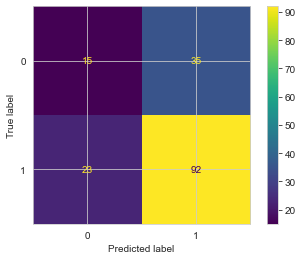

In [150]:
plot_confusion_matrix(model1,X_test5, y_test5 )

In [152]:
#pd.DataFrame(index=X.columns,data=model1.feature_importances_,columns=['Feature Importance']).sort_values("Feature Importance")

[Text(299.6324629934211, 422.8, 'X[2] <= 8.06\ngini = 0.426\nsamples = 383\nvalue = [118, 265]'),
 Text(124.1733552631579, 398.64, 'X[1] <= 2386.5\ngini = 0.468\nsamples = 163\nvalue = [61, 102]'),
 Text(35.97631578947369, 374.48, 'X[1] <= 2171.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(30.10263157894737, 350.32, 'X[1] <= 2082.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(24.228947368421053, 326.15999999999997, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(35.97631578947369, 326.15999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(41.85, 350.32, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(212.37039473684212, 374.48, 'X[1] <= 5283.0\ngini = 0.449\nsamples = 153\nvalue = [52, 101]'),
 Text(126.6513157894737, 350.32, 'X[5] <= 1.5\ngini = 0.476\nsamples = 95\nvalue = [37, 58]'),
 Text(47.72368421052632, 326.15999999999997, 'X[3] <= 270.0\ngini = 0.444\nsamples = 72\nvalue = [24, 48]'),
 Text(17.621052631578948, 302.0, 'X[3] <= 78.0\ngini = 0.198\nsa

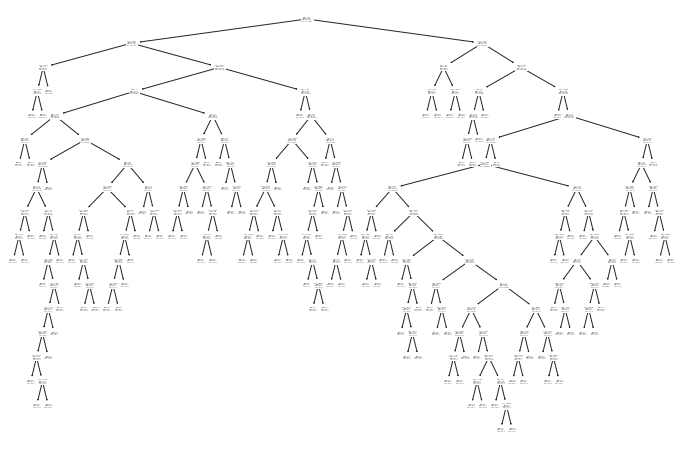

In [153]:
plt.figure(figsize=(12, 8))
plot_tree(model1)

[Text(443.2852957589286, 710.304, 'ApplicantIncome <= 420.0\ngini = 0.426\nsamples = 370\nvalue = [114, 256]'),
 Text(365.0890066964286, 681.3119999999999, 'Education <= 1805.5\ngini = 0.416\nsamples = 362\nvalue = [107, 255]'),
 Text(235.26785714285717, 652.3199999999999, 'Self_Employed <= 2925.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(226.4107142857143, 623.328, 'Self_Employed <= 2056.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(217.55357142857144, 594.336, 'Education <= 1519.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(208.69642857142858, 565.3439999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(226.4107142857143, 565.3439999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(235.26785714285717, 594.336, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(244.125, 623.328, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(494.91015625, 652.3199999999999, 'Education <= 9981.5\ngini = 0.407\nsamples = 351\nvalue = [100, 251]'),
 Text(486.0530

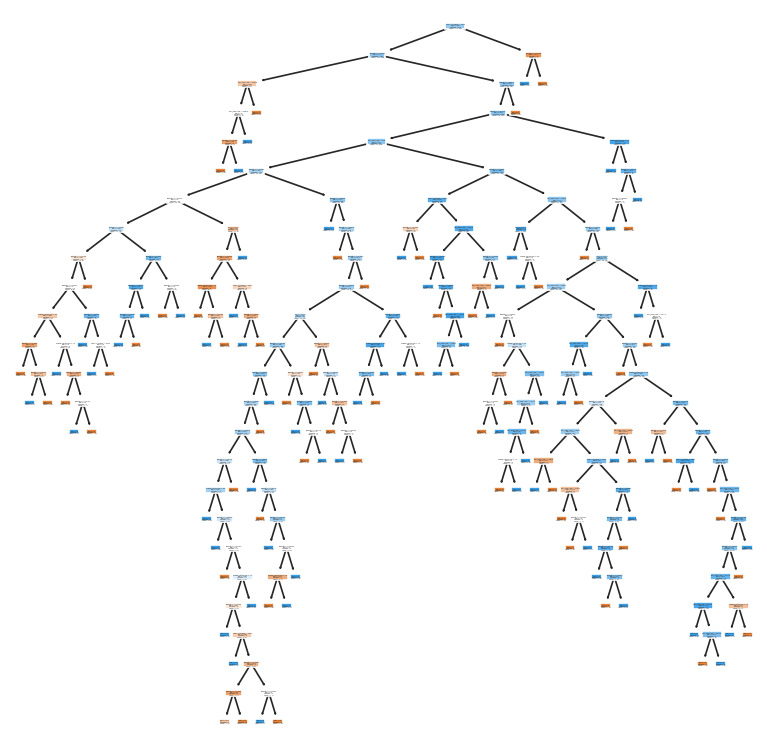

In [187]:
plt.figure(figsize=(8,8), dpi=120)
plot_tree(model1, filled=True, feature_names=X.columns)

поменяем критерий на энтропия, макс глубина 4

In [154]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [155]:
model2.fit(X_train5, y_train5)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

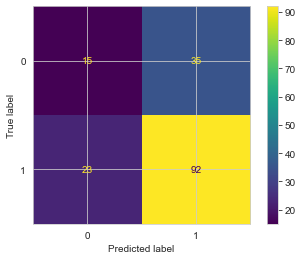

In [156]:
plot_confusion_matrix(model1,X_test5, y_test5 )

[Text(418.50000000000006, 391.392, 'X[3] <= 420.0\nentropy = 0.891\nsamples = 370\nvalue = [114, 256]'),
 Text(279.0, 304.416, 'X[1] <= 1805.5\nentropy = 0.876\nsamples = 362\nvalue = [107, 255]'),
 Text(167.4, 217.44, 'X[2] <= 2925.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(111.60000000000001, 130.464, 'X[2] <= 2056.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(55.800000000000004, 43.488, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(167.4, 43.488, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(223.20000000000002, 130.464, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(390.6, 217.44, 'X[1] <= 9981.5\nentropy = 0.862\nsamples = 351\nvalue = [100, 251]'),
 Text(334.8, 130.464, 'X[1] <= 8941.0\nentropy = 0.857\nsamples = 349\nvalue = [98, 251]'),
 Text(279.0, 43.488, 'entropy = 0.869\nsamples = 338\nvalue = [98, 240]'),
 Text(390.6, 43.488, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(446.40000000000003, 130.464, 'entropy = 0.0\nsamp

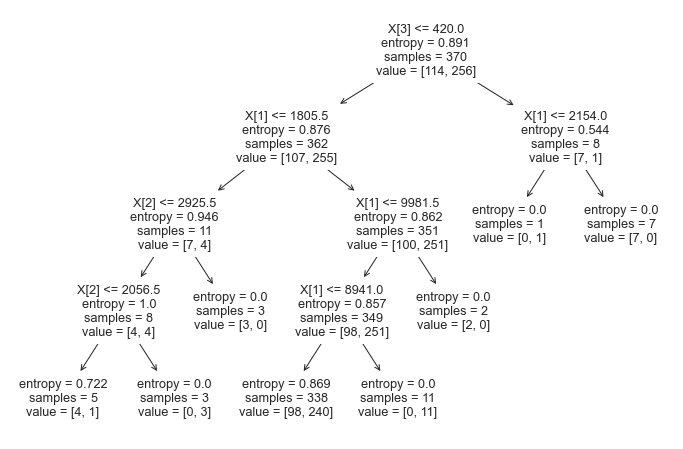

In [192]:
plt.figure(figsize=(12, 8))
plot_tree(model2)

[Text(465.0, 652.3199999999999, 'ApplicantIncome <= 420.0\nentropy = 0.891\nsamples = 370\nvalue = [114, 256]'),
 Text(310.0, 507.36, 'Education <= 1805.5\nentropy = 0.876\nsamples = 362\nvalue = [107, 255]'),
 Text(186.0, 362.4, 'Self_Employed <= 2925.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(124.0, 217.44000000000005, 'Self_Employed <= 2056.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(62.0, 72.48000000000002, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(186.0, 72.48000000000002, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(248.0, 217.44000000000005, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(434.0, 362.4, 'Education <= 9981.5\nentropy = 0.862\nsamples = 351\nvalue = [100, 251]'),
 Text(372.0, 217.44000000000005, 'Education <= 8941.0\nentropy = 0.857\nsamples = 349\nvalue = [98, 251]'),
 Text(310.0, 72.48000000000002, 'entropy = 0.869\nsamples = 338\nvalue = [98, 240]'),
 Text(434.0, 72.48000000000002, 'entropy = 0.0\nsamples = 11\

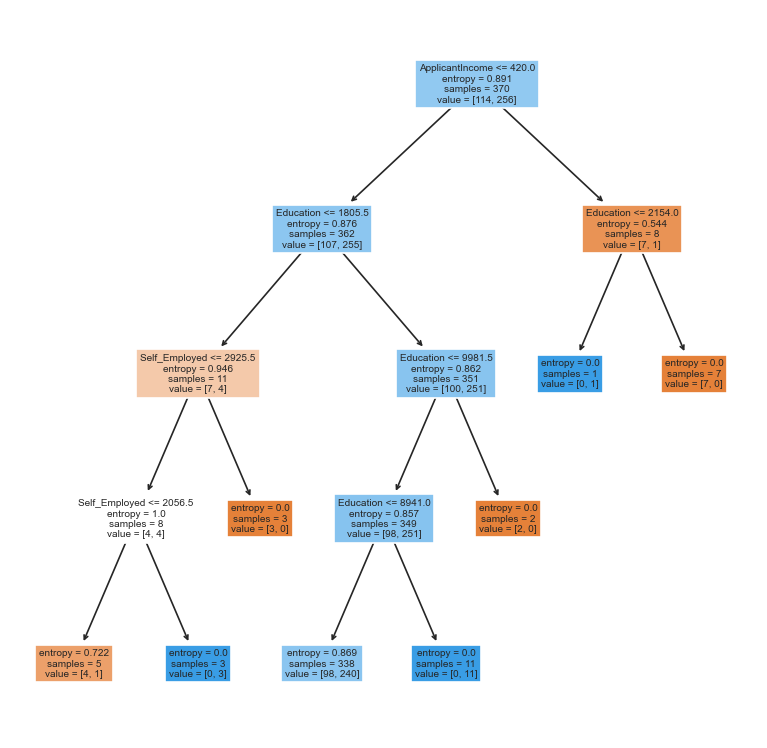

In [193]:
plt.figure(figsize=(8,8), dpi=120)
plot_tree(model2, filled=True, feature_names=X.columns)

как итог дерево решений стало намного лучше и понятней 